In [2]:
%matplotlib inline

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import pandas as pd
from scipy.misc import imread, imsave, imresize


In [2]:
%run features.py

In [5]:
%run traffic_util.py

In [6]:
X_train, y_train, X_test, y_test = traffic_load("../../../data")

In [7]:
##X_train, X_test = traffic_resize(X_train, X_test, 2)

In [22]:
X_test_g = map(lambda x : cv2.cvtColor(x,cv2.COLOR_BGR2GRAY), X_test)


In [28]:
X_train_g = map(lambda x : cv2.cvtColor(x,cv2.COLOR_BGR2GRAY), X_train)

In [31]:
print np.shape(X_train_g), np.shape(X_test_g)

(10438L, 240L, 320L) (2625L, 240L, 320L)


In [9]:
info_train, info_test = traffic_info_load("../../../data")

In [32]:
# Lets do everything for train data

# 1) Find corners
def imgs2corners(img_list):
    return map(lambda x : np.int0(cv2.goodFeaturesToTrack(x,100,0.01,10)), img_list)

In [86]:
corners_train = map(lambda x : np.log10(cv2.goodFeaturesToTrack(x,100,0.01,10)), X_train_g)

KeyboardInterrupt: 

In [85]:
np.shape(np.vstack((corners_train, corners_train)))

(2L, 10438L)

In [56]:
corners = np.array(corners_train)

In [ ]:
np.array(corners_tr)

In [27]:
np.save("../../../inputs/corners_train.npy", corners)

In [ ]:
print corners.shape

In [19]:
np.save("../../../inputs/corners_train.npy", corners)

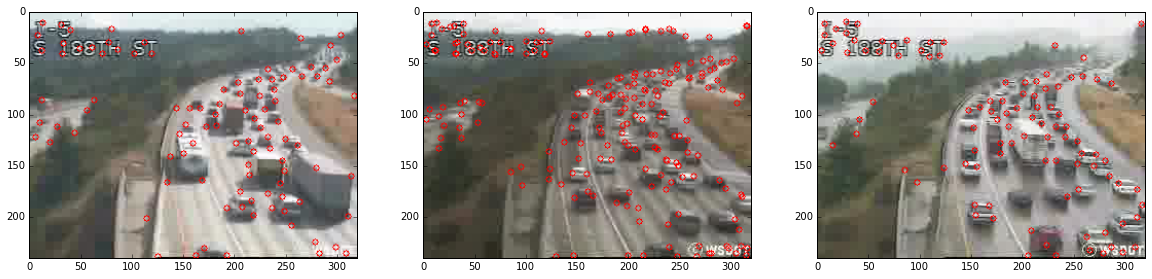

In [27]:
plt.figure(figsize = (20,20))

indss = [100, 200, 300]

for i in corners[indss[0]]:
    x,y = i.ravel()
    cv2.circle(X_test[indss[0]],(x,y),3, (255,0,0))   
plt.subplot(1, 3, 1)
plt.imshow(X_test[indss[0]])

for i in corners[indss[1]]:
    x,y = i.ravel()
    cv2.circle(X_test[indss[1]],(x,y),3, (255,0,0))
plt.subplot(1, 3, 2)
plt.imshow(X_test[indss[1]])

for i in corners[indss[2]]:
    x,y = i.ravel()
    cv2.circle(X_test[indss[2]],(x,y),3, (255,0,0))
plt.subplot(1, 3, 3)
plt.imshow(X_test[indss[2]])

In [25]:
np.save("../../../inputs/corners_test.npy", corners)

In [30]:
video_inds = set(info_train)
print len(video_inds)

203


In [47]:
corners_all = []
for video_ind in video_inds:
    frames = X_train[info_train == video_ind]
    corners_all = np.append(corners_all, imgs2corners(frames), axis=0)
        
print corners_all.shape

(2087L,)


In [ ]:
corners

In [46]:
#Draw corners as cirles
corners = corners_all

plt.figure(figsize = (20,20))

for i in corners[0]:
    x,y = i.ravel()
    cv2.circle(img_list[0],(x,y),3, (255,0,0))   
plt.subplot(1, 3, 1)
plt.imshow(img_list[0])

for i in corners[1]:
    x,y = i.ravel()
    cv2.circle(img_list[1],(x,y),3, (255,0,0))
plt.subplot(1, 3, 2)
plt.imshow(img_list[1])

for i in corners[2]:
    x,y = i.ravel()
    cv2.circle(img_list[2],(x,y),3, (255,0,0))
plt.subplot(1, 3, 3)
plt.imshow(img_list[2])

NameError: name 'img_list' is not defined